In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pandas.plotting import register_matplotlib_converters


In [2]:
%matplotlib inline

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [4]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments)

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




In [5]:
df_bild.describe()

,articles_counts,day,lesbarkeit,month,polarity,subjectivity,thread_counts,word_counts,year
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.0
mean,1.0,17.142857,43.896531,9.673469,0.036057,0.123487,0.0,307.826531,2019.0
std,0.0,6.013730,14.278916,3.248395,0.259439,0.168485,0.0,225.784179,0.0
min,1.0,12.000000,5.300000,1.000000,-1.000000,0.000000,0.0,26.000000,2019.0
25%,1.0,12.000000,35.382500,10.000000,-0.090265,0.003125,0.0,120.500000,2019.0
50%,1.0,15.000000,44.170000,11.000000,0.048237,0.072556,0.0,281.500000,2019.0
75%,1.0,21.000000,53.387500,12.000000,0.171275,0.166667,0.0,442.000000,2019.0
max,1.0,30.000000,72.530000,12.000000,1.000000,1.000000,0.0,1037.000000,2019.0


In [6]:
df_spiegel.describe()

,articles_counts,day,lesbarkeit,month,polarity,subjectivity,thread_counts,word_counts,year,mean_comment_pol,min_comment_pol,max_comment_pol,median_comment_pol,mean_comment_subj,min_comment_subj,max_comment_subj,median_comment_subj
count,864.0,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.0,625.000000,625.000000
mean,1.0,15.766204,50.094271,7.425926,0.060070,0.086003,105.464120,581.077546,2017.819444,0.085033,-0.812014,0.913965,0.042270,0.090023,0.0,0.781632,0.007137
std,0.0,7.930373,8.634257,3.288249,0.109733,0.062545,143.695567,319.679220,1.340100,0.048396,0.251083,0.158485,0.051810,0.022671,0.0,0.250356,0.020701
min,1.0,1.000000,12.200000,1.000000,-0.370000,0.000000,0.000000,57.000000,2015.000000,-0.086380,-1.000000,0.287500,-0.050000,0.005128,0.0,0.066667,0.000000
25%,1.0,10.000000,45.565000,5.000000,-0.011112,0.041385,0.000000,349.000000,2017.000000,0.059195,-1.000000,0.875000,0.000000,0.076230,0.0,0.500000,0.000000
50%,1.0,14.000000,50.460000,8.000000,0.064199,0.080397,57.000000,498.000000,2018.000000,0.083858,-1.000000,1.000000,0.030000,0.089686,0.0,1.000000,0.000000
75%,1.0,22.000000,56.050000,10.000000,0.125118,0.123207,143.750000,776.500000,2019.000000,0.106311,-0.666667,1.000000,0.069722,0.102193,0.0,1.000000,0.000000
max,1.0,31.000000,73.580000,12.000000,0.428571,0.500000,1251.000000,3381.000000,2019.000000,0.343558,0.000000,1.000000,0.360714,0.214141,0.0,1.000000,0.191667


In [9]:
art_monatl = df_spiegel[["year","month","day","articles_counts"]]


In [11]:
g = art_monatl.groupby(['year','month'])['articles_counts'].count()
g

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [13]:
# Anzahl Artikel pro Jahr und Monat
g.unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,2,2,2,1,2,4,2,3,12,7,19,13
2016,5,8,10,6,9,4,4,9,14,11,11,8
2017,9,18,17,10,10,9,13,12,11,13,22,12
2018,8,7,12,6,8,9,6,15,20,10,18,16
2019,15,22,17,21,30,39,26,28,111,27,43,26


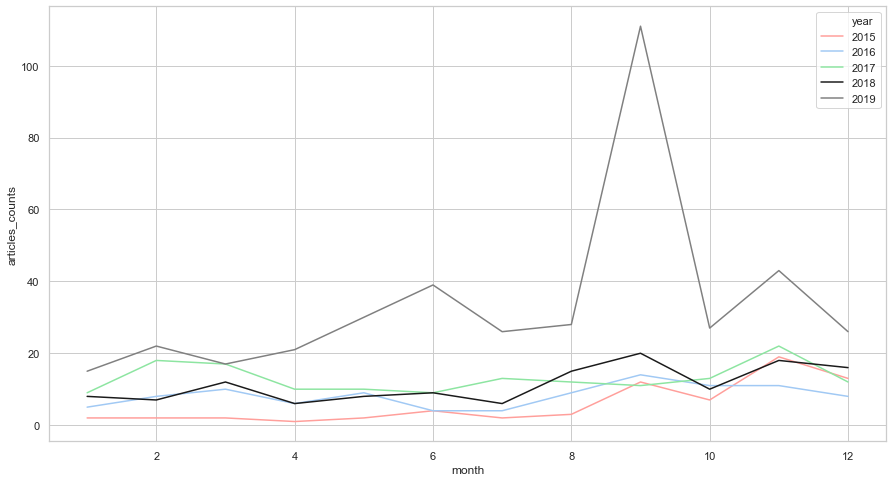

In [52]:
## in diesem Abschnitt werden die Variablen Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity und Anzahl Kommentare nach Jahr/Monat gruppiert und die Entwicklung mit lineplot dargestellt (Anzahl Wörter relevant?)
# Entwicklung Anzahl Artikel pro Jahr und Monat
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='articles_counts', hue='year', palette=["r", "b", 'g', 'k', 'grey'], data=g)

In [71]:
# Entwicklung Lesbarkeit pro Jahr/Monat
entw_l = df_spiegel.groupby(['year','month'])['lesbarkeit'].count()
entw_l

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [73]:
entw_l = pd.DataFrame(entw_l)
entw_l.reset_index(inplace=True)

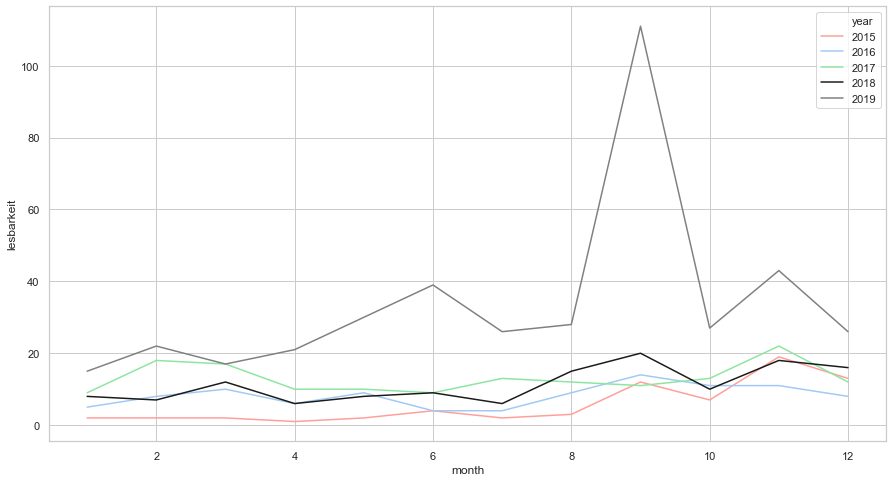

In [77]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='lesbarkeit', hue='year', palette=["r", "b", 'g', 'k', 'grey'], data=entw_l)

In [78]:
# Entwicklung Polarity pro Jahr/Monat
entw_p = df_spiegel.groupby(['year','month'])['polarity'].count()
entw_p

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [81]:
entw_p = pd.DataFrame(entw_p)
entw_p.reset_index(inplace=True)

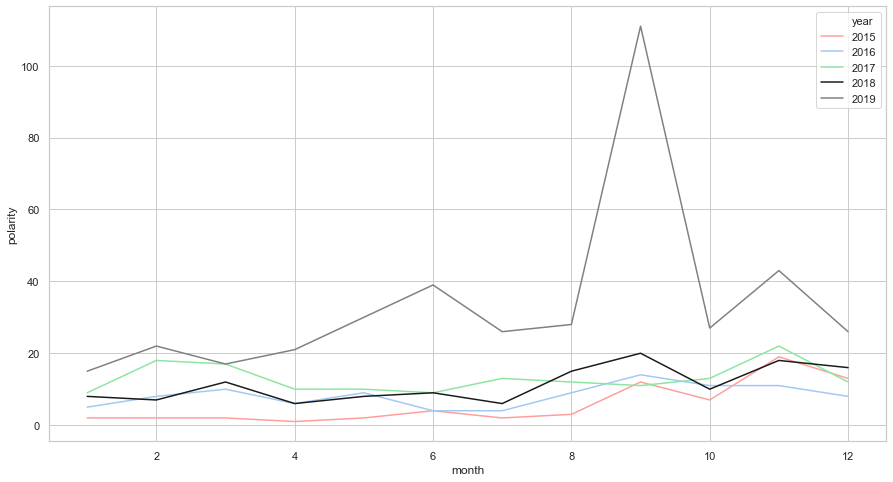

In [83]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='polarity', hue='year', palette=["r", "b", 'g', 'k', 'grey'], data=entw_p)

In [89]:
# Entwicklung Subjectivity pro Jahr/Monat
entw_s = df_spiegel.groupby(['year','month'])['subjectivity'].count()
entw_s

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [91]:
entw_s = pd.DataFrame(entw_s)
entw_s.reset_index(inplace=True)

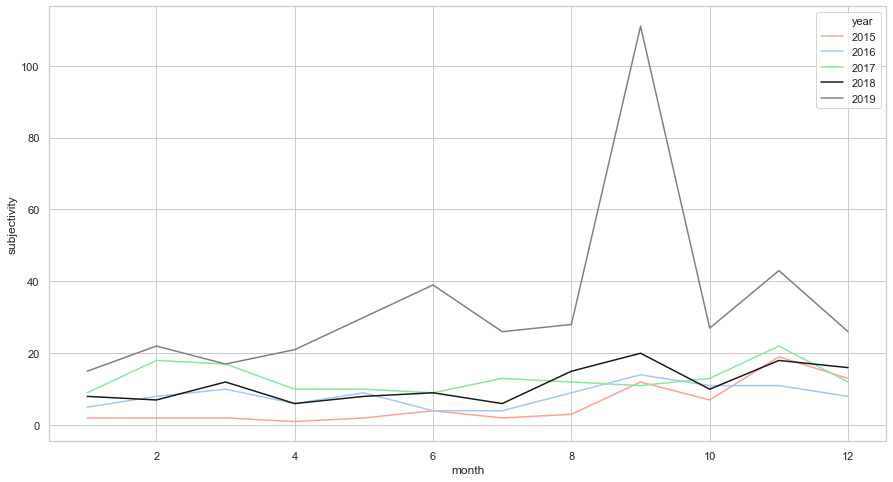

In [92]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='subjectivity', hue='year', palette=["r", "b", 'g', 'k', 'grey'], data=entw_s)

In [93]:
# Entwicklung Anzahl Kommentare pro Jahr/Monat
entw_k = df_spiegel.groupby(['year','month'])['thread_counts'].count()
entw_k

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [94]:
entw_k = pd.DataFrame(entw_k)
entw_k.reset_index(inplace=True)

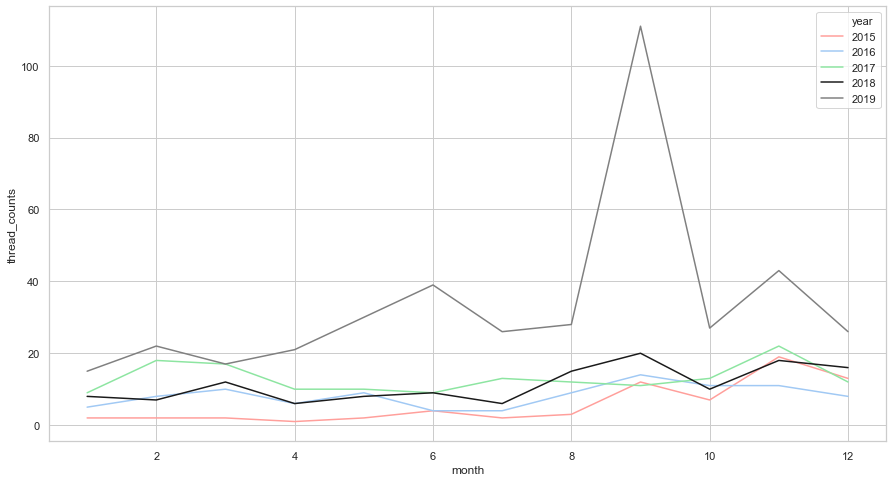

In [95]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='month', y='thread_counts', hue='year', palette=["r", "b", 'g', 'k', 'grey'], data=entw_k)

In [113]:
# Anzahl Artikel Spiegel
grouped = df_spiegel.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2015,46042,127,3381,667.275362,587
2016,51220,117,1151,517.373737,476
2017,82540,124,1461,529.102564,464
2018,78060,124,1676,578.222222,489
2019,244189,57,2210,602.935802,512


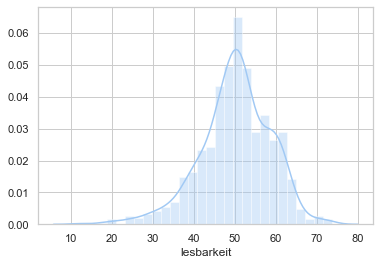

In [102]:
## Verteilung Variablen Spiegel, Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity, Anzahl Kommentare dargestellt mit distplots
# Entwicklung Lesbarkeit Spiegel
l = sns.distplot(df_spiegel.lesbarkeit.dropna())

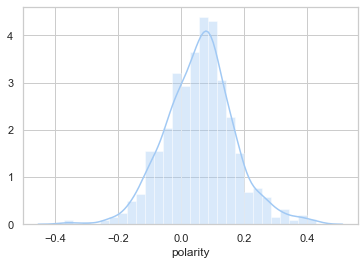

In [103]:
p = sns.distplot(df_spiegel.polarity.dropna())

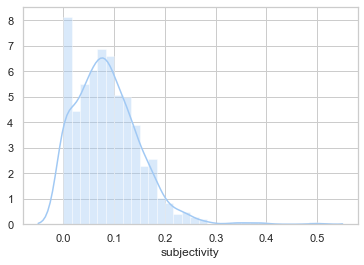

In [104]:
p= sns.distplot(df_spiegel.subjectivity.dropna())

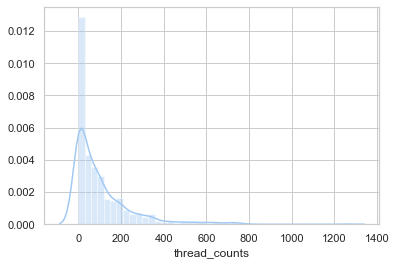

In [106]:
t = sns.distplot(df_spiegel.thread_counts.dropna())

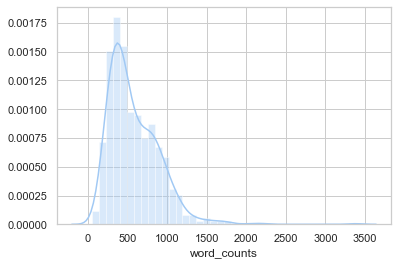

In [114]:

w = sns.distplot(df_spiegel.word_counts.dropna())

In [115]:
# Anzahl Artikel Bild
grouped_b = df_bild.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped_b.columns = ['_'.join(x) for x in grouped_b.columns]
grouped_b

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2019,30167,26,1037,307.826531,281.5


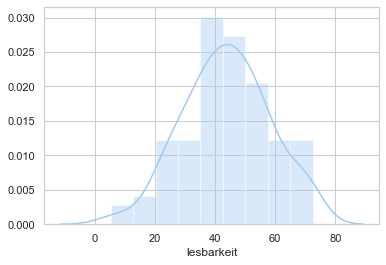

In [108]:
## Verteilung Variablen Bild, Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity, Anzahl Kommentare dargestellt mit distplots
l_b = sns.distplot(df_bild.lesbarkeit.dropna())

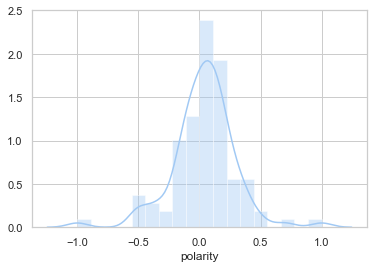

In [110]:
p_b = sns.distplot(df_bild.polarity.dropna())

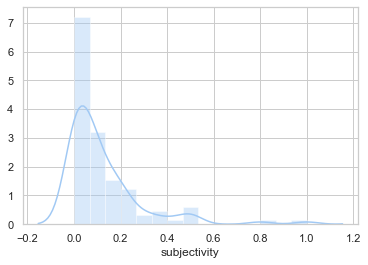

In [111]:
s_b = sns.distplot(df_bild.subjectivity.dropna())

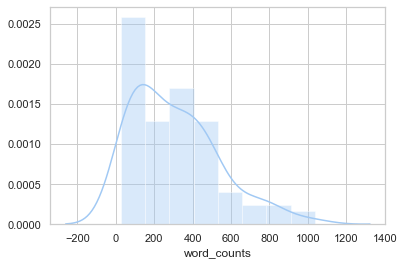

In [112]:
w_b = sns.distplot(df_bild.word_counts.dropna())

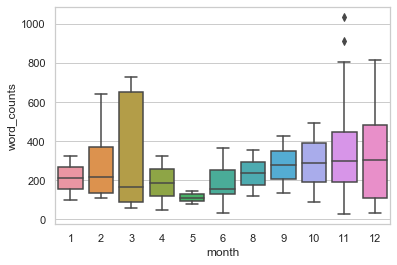

In [62]:
ax = sns.boxplot(x="month", y="word_counts", data=df_bild)

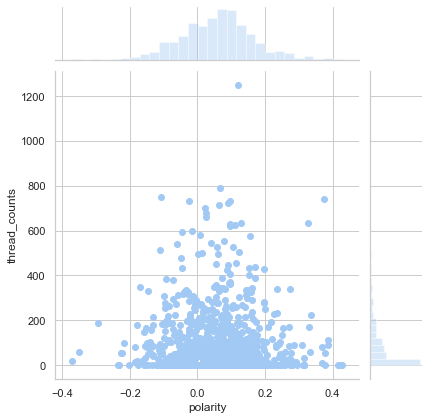

In [67]:
# Jointplot zw. polarity und Anzahl Kommentare (dieselbe Ausertung mit 3 unterschiedlichen Visualisierungen: kind: scatter/hex/kde)
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='scatter')

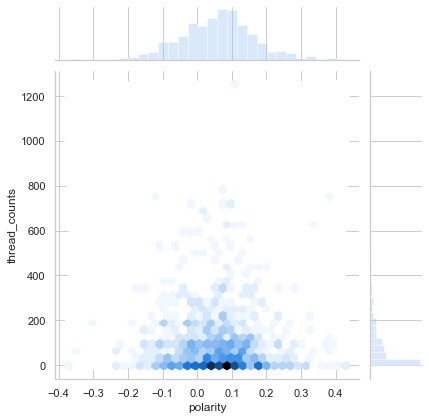

In [64]:
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='hex')

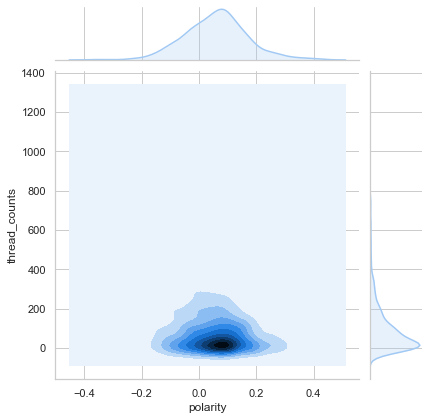

In [68]:
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='kde')

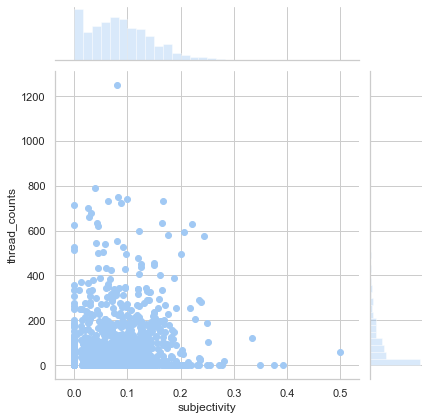

In [116]:
# Jointplot zw. subjectivity und Anzahl Kommentare (dieselbe Ausertung mit 3 unterschiedlichen Visualisierungen: kind: scatter/hex/kde)
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='scatter')

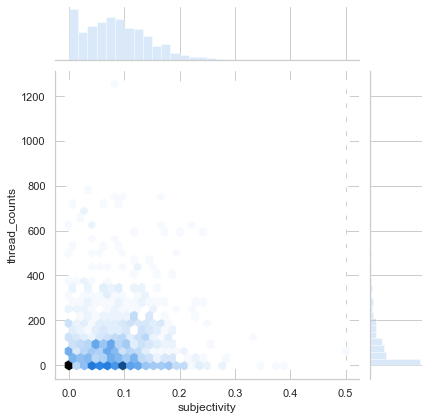

In [117]:
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='hex')

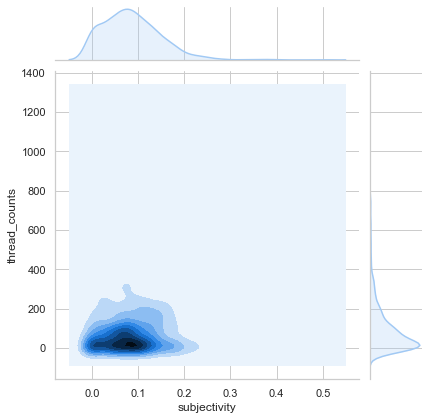

In [118]:
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='kde')

In [126]:
df_comments

,mean_comment_pol,min_comment_pol,max_comment_pol,median_comment_pol,mean_comment_subj,min_comment_subj,max_comment_subj,median_comment_subj
Id,,,,,,,,
article_10p0.txt,0.089066,-1.000000,1.000000,0.065196,0.097572,0.0,1.000000,0.000000
article_10p1.txt,0.072774,-1.000000,1.000000,0.000000,0.096466,0.0,1.000000,0.000000
article_10p2.txt,0.058812,-1.000000,1.000000,0.038889,0.122138,0.0,1.000000,0.000000
article_10p3.txt,0.074193,-1.000000,0.900000,0.070000,0.119300,0.0,1.000000,0.000000
article_10p4.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_10p5.txt,0.145620,-1.000000,1.000000,0.060000,0.073718,0.0,1.000000,0.000000
article_10p6.txt,-0.007041,-1.000000,1.000000,0.000000,0.086276,0.0,1.000000,0.000000
article_10p7.txt,0.093548,-1.000000,1.000000,0.000000,0.089205,0.0,1.000000,0.000000
article_10p8.txt,0.231102,-0.560000,1.000000,0.151136,0.072022,0.0,0.426667,0.000000
